<a href="https://colab.research.google.com/github/Dhanshree-Dhakite/chatgpt-analysis/blob/main/chatgpt_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
sheet_id = "19iPj5guAaShFRUnO6XPYld3HZkUc2QGxUyaxFL2vkS0"
sheet_name = "chatgpt_reviews"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)
df.head(20)

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39
5,9cdc3f78-15cd-4e9d-9287-31bc5af496c4,so nice app,5,2024-08-23 19:18:35
6,3c26ee92-4d72-45ee-9242-caab930903ca,"just love this app, or guy",4,2024-08-23 19:14:40
7,f293ed19-688a-42e2-8282-ddd077771a94,great app,1,2024-08-23 19:12:00
8,99af016c-6db2-4f24-9952-cb3bece40be8,Very impressive,5,2024-08-23 19:11:46
9,27dd6ea5-ada3-4795-a297-6faa7d4b6ba2,helps with coding a lot this ai is great for e...,5,2024-08-23 19:11:09


In [ ]:
df.describe()

,Ratings
count,196727.000000
mean,4.503535
std,1.083004
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
print(df.columns)
print(df.shape)
print(df.isnull().sum())

Index(['Review Id', 'Review', 'Ratings', 'Review Date'], dtype='object')
(196727, 4)
Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64



1.   Average Monthly Rating - avg rating in each month to understand the overall monthly sentiment of users for chatgpt
2.   What month has the most 5 star rating and lowest 5 rating to understand in depth reasons for the same
3.   What month has the most 1 star rating and lowest 1 rating
4.   Understanding overall sentiment of users from rating and review
5.   Month with most review and least reviews and why
6.   Any correlation between Ratings and Month
7.   Distribution of Ratings across months







In [ ]:

df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Month'] = df['Review Date'].dt.month_name()
df['Year'] = df['Review Date'].dt.year

print(df[['Review Date', 'Month','Year']].head())


          Review Date   Month  Year
0 2024-08-23 19:30:05  August  2024
1 2024-08-23 19:28:18  August  2024
2 2024-08-23 19:22:59  August  2024
3 2024-08-23 19:20:50  August  2024
4 2024-08-23 19:20:39  August  2024


In [ ]:
df['Month_Label'] = df['Review Date'].dt.strftime("%b'%y")
monthly_avg = df.groupby('Month_Label')['Ratings'].mean().reset_index()
df['Month_Year'] = df['Review Date'].dt.to_period('M').dt.to_timestamp()
monthly_avg = df.groupby(['Month_Year']).agg({'Ratings': 'mean'}).reset_index()
monthly_avg['Month_Label'] = monthly_avg['Month_Year'].dt.strftime("%b'%y")


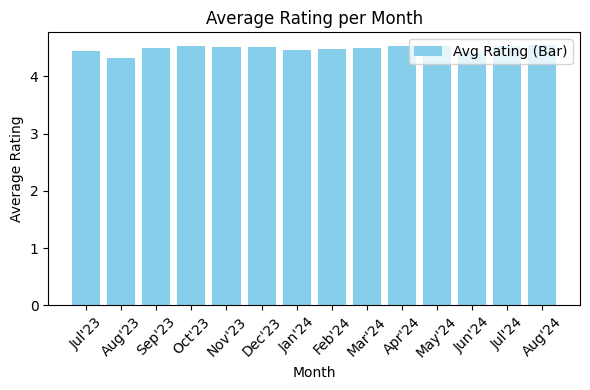

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(monthly_avg['Month_Label'], monthly_avg['Ratings'], color='skyblue', label='Avg Rating (Bar)')

plt.title("Average Rating per Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


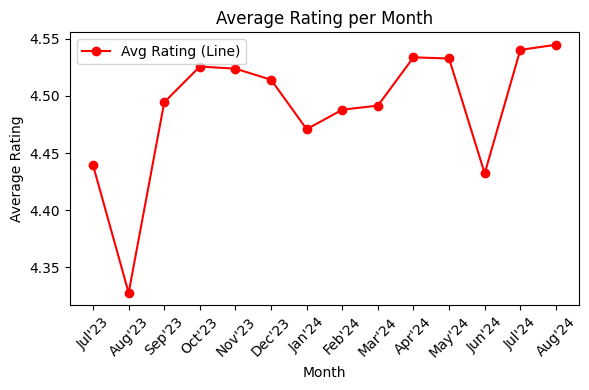

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(monthly_avg['Month_Label'], monthly_avg['Ratings'], color='red', marker='o', label='Avg Rating (Line)')

plt.title("Average Rating per Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

df_5star = df[df['Ratings'] == 5]
monthly_5star = df_5star.groupby('Month_Year').size().reset_index(name='FiveStarCount')
monthly_5star['Month_Label'] = monthly_5star['Month_Year'].dt.strftime("%b'%y")

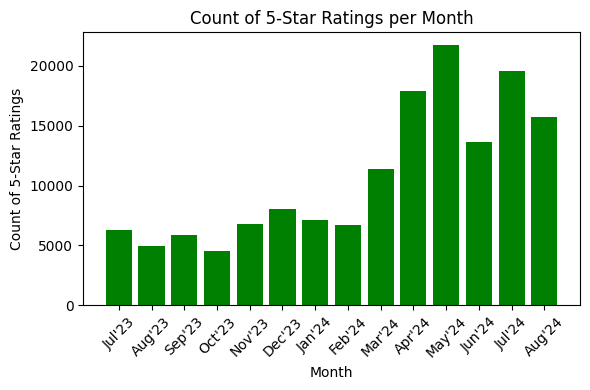

In [ ]:

plt.figure(figsize=(6, 4))
plt.bar(monthly_5star['Month_Label'], monthly_5star['FiveStarCount'], color='green')

plt.title("Count of 5-Star Ratings per Month")
plt.xlabel("Month")
plt.ylabel("Count of 5-Star Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


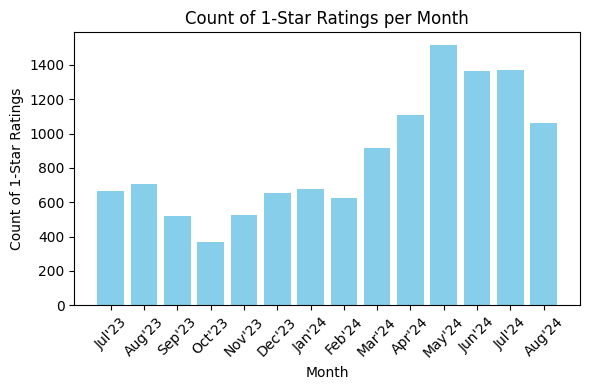

In [ ]:
df_1star = df[df['Ratings'] == 1]
monthly_1star = df_1star.groupby('Month_Year').size().reset_index(name='OneStarCount')
monthly_1star['Month_Label'] = monthly_1star['Month_Year'].dt.strftime("%b'%y")

plt.figure(figsize=(6, 4))
plt.bar(monthly_1star['Month_Label'], monthly_1star['OneStarCount'], color='skyblue')
plt.title("Count of 1-Star Ratings per Month")
plt.xlabel("Month")
plt.ylabel("Count of 1-Star Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

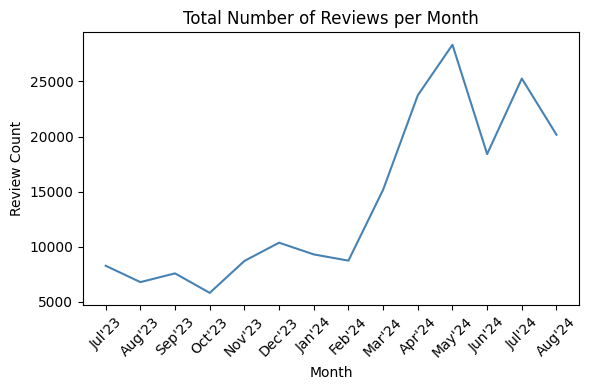

In [ ]:
monthly_review_count = df.groupby('Month_Year').size().reset_index(name='ReviewCount')
monthly_review_count['Month_Label'] = monthly_review_count['Month_Year'].dt.strftime("%b'%y")

plt.figure(figsize=(6, 4))
plt.plot(monthly_review_count['Month_Label'], monthly_review_count['ReviewCount'], color='steelblue')
plt.title("Total Number of Reviews per Month")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



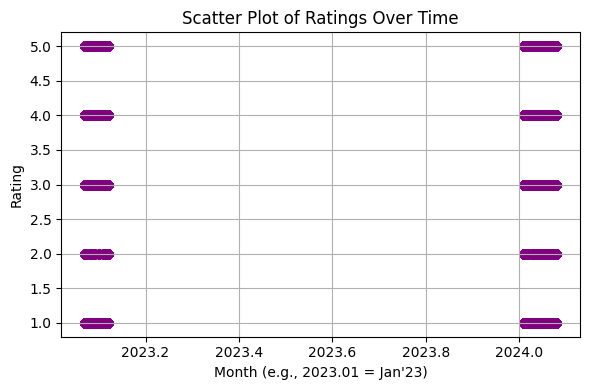

In [ ]:
df['Month_Num'] = df['Month_Year'].dt.year + (df['Month_Year'].dt.month / 100)
plt.figure(figsize=(6, 4))
plt.scatter(df['Month_Num'], df['Ratings'], alpha=0.5, color='purple')

plt.title("Scatter Plot of Ratings Over Time")
plt.xlabel("Month (e.g., 2023.01 = Jan'23)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


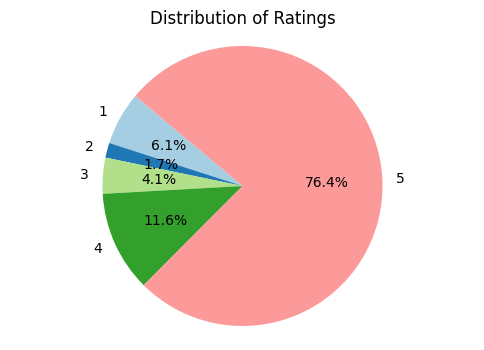

In [ ]:
rating_counts = df['Ratings'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Ratings")
plt.axis('equal')
plt.show()
